In [7]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
happiness_2015 = pd.read_csv("C:/Users/Dipendra Singh/Downloads/Lecture/2015.csv")
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
happiness_2015.columns= ['Country','Region','Happiness_Rank','Happiness_Score','Standard Error','Economy','Family','Health','Freedom','Trust','Generosity','Dystopia_Residual']

In [10]:
columns_2015 =['Region','Standard Error']
new_happiness_2015= happiness_2015.drop(columns_2015, axis=1)
new_happiness_2015.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
happiness_2016 = pd.read_csv("C:/Users/Dipendra Singh/Downloads/Lecture/2016.csv")
happiness_2016.head()


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [12]:
columns_2016 =['Region','Lower Confidence Interval','Upper Confidence Interval']
new_happiness_2016= happiness_2016.drop(columns_2016, axis=1)
new_happiness_2016.columns=['Country','Happiness_Rank','Happiness_Score','Economy','Family','Health','Freedom','Trust','Generosity',
                           'Dystopia_Residual']
new_happiness_2016.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [13]:
happiness_2017 = pd.read_csv("C:/Users/Dipendra Singh/Downloads/Lecture/2017.csv")
happiness_2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
columns_2017 =['Whisker.high','Whisker.low']
new_happiness_2017= happiness_2017.drop(columns_2017, axis=1)
new_happiness_2017.columns=['Country','Happiness_Rank','Happiness_Score','Economy','Family','Health','Freedom','Trust','Generosity',
                           'Dystopia_Residual']
new_happiness_2017.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
frames= [new_happiness_2015, new_happiness_2016, new_happiness_2017]
happiness= pd.concat(frames)

happiness.to_csv('happiness.csv',encoding='utf-8')

In [16]:
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [18]:
data= dict(type ='choropleth',
          locations = happiness['Country'],
          locationmode= 'country names',
          z = happiness['Happiness_Rank'],
          text= happiness['Country'],
          colorscale='viridis')
layout = dict(title= 'Happiness Rank Across the World')
fig = go.Figure(data =[data], layout=layout)
iplot(fig)

In [19]:
trace4 = go.Scatter(
    x = happiness.Happiness_Score,
    y = happiness.Happiness_Rank,
    mode ='markers'
)
data4 =[trace4]
layout = go.Layout(
     title='Happiness Rank Determined by Score',
    xaxis=dict(
        title= 'Happiness Score',
        titlefont=dict(
            family='Corier New, monospace',
            size=20,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Happiness Rank',
        titlefont=dict(
           family='Courier New, monospace',
           size=20,
           color='#7f7f7f'
        )
    )
)
fig4=go.Figure(data=data4, layout=layout)
iplot(fig4)

In [20]:
drop_rank =happiness.drop("Happiness_Rank", axis=1)

In [21]:
corr_matrix_happy = drop_rank.corr()
trace_corr_happy =go.Heatmap(z=np.array(corr_matrix_happy),
                            x=corr_matrix_happy.columns,
                            y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
iplot(data_happy)

In [22]:
dropped_happy= happiness.drop(["Country", "Happiness_Rank"], axis=1)
dropped_happy.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
#splitting into train and test data
import pandas as pd
import numpy as np

X = dropped_happy.drop(['Happiness_Score'], axis=1)
y = dropped_happy['Happiness_Score']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [24]:
from sklearn.linear_model import LinearRegression
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred =lm.predict(X_test)

In [34]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred,
})
result_lm['Diff'] =  y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
141,3.766,3.766569,-0.000569
82,5.237,5.237260,-0.000260
36,6.344,6.343706,0.000293
116,4.497,4.496886,0.000115
39,6.269,6.269256,-0.000256


In [35]:
print("Estimated Intercepts is", lm.intercept_)

Estimated Intercepts is 0.0001824170829385352


In [36]:
print("The number of coefficients in this model are", lm.coef_)

The number of coefficients in this model are [1.00004514 0.99999022 0.99984257 0.99994723 0.99998091 1.00001189
 0.99995431]


In [37]:
coef =zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','coefficients'])
coef_df

,features,coefficients
0,Economy,1.000045
1,Family,0.999990
2,Health,0.999843
3,Freedom,0.999947
4,Trust,0.999981
5,Generosity,1.000012
6,Dystopia_Residual,0.999954


In [38]:
from sklearn.metrics import mean_absolute_error
%matplotlib inline
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Square Error:',   mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % lm.score(X_test, y_test))

Mean Absolute Error: 0.00024785338075514847
Mean Square Error: 8.228990168312277e-08
Root Mean Squared Error: 0.00028686216495578984
Variance score: 1.00


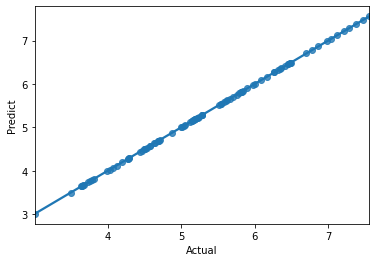

In [39]:
import seaborn as sns
%matplotlib inline
sns.regplot(x='Actual', y= 'Predict', data=result_lm)